<a href="https://colab.research.google.com/github/ananya1105/Image_Classification_Fashion_MNIST/blob/master/Image_Classification_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.15.0


4423680/4422102 [==============================] - 0s 0us/step
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4]
[9 2 1 ... 8 1 5]


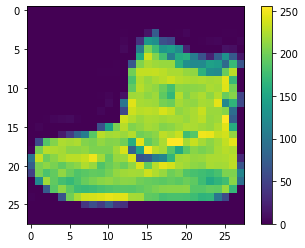

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
train_images.shape
print(train_labels[0:25])
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
len(test_labels)
print(test_labels)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

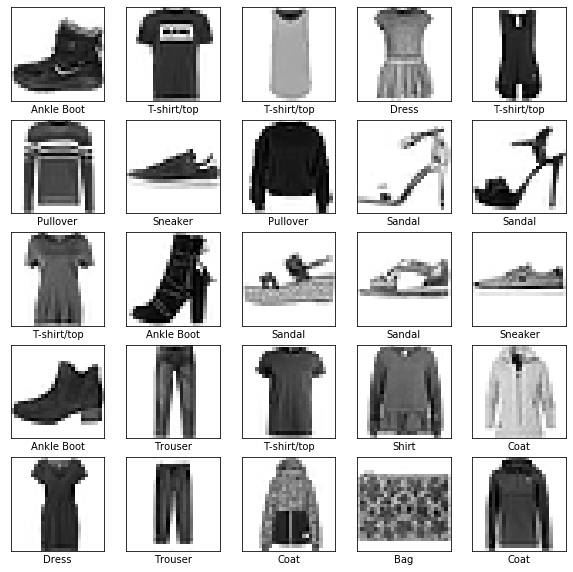

In [4]:
#We are scaling the values between 0 to 1 so we divide the values by 255.
train_images = train_images/255
test_images = test_images/255

#We will display first 25 images from the training dataset and display the labels along with them.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

In [5]:
#Now we will build the model
#Earlier, I was using relu as the activation funciton in all the layers.
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28, 28)),
        keras.layers.Dense(128, activation = tf.nn.relu),
        
        keras.layers.Dense(128, activation = tf.nn.leaky_relu),
        keras.layers.Dense(128, activation = tf.nn.leaky_relu),
        keras.layers.Dense(128, activation = tf.nn.leaky_relu),
        keras.layers.Dense(128, activation = tf.nn.leaky_relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
#Now, we will compile the model (Difference between sparse_categorical_crossentropy and categorical_crossentropy)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#We will fit the model to the training data
#I have also increased the number of training iterations(epochs).
model.fit(train_images, train_labels, epochs = 30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 102us/sample - loss: 0.5002 - acc: 0.8146
Epoch 2/30
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3745 - acc: 0.8621
Epoch 3/30
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3425 - acc: 0.8750
Epoch 4/30
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3212 - acc: 0.8810
Epoch 5/30
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3048 - acc: 0.8864
Epoch 6/30
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2886 - acc: 0.8932
Epoch 7/30
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2782 - acc: 0.8964
Epoch 8/30
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2675 - acc: 0.9001
Epoch 9/30
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2590 - acc: 0.9025
Epoch 10/30
60000/60000 [==============================] -

In [7]:
#Model Performance for test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_loss, test_accuracy)
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])
#The array here signifies the confidence values


10000/10000 [==============================] - 0s 37us/sample - loss: 0.3832 - acc: 0.8875
0.3831643712922931 0.8875
[2.0487283e-09 1.0180883e-08 2.2912788e-07 1.3315396e-07 1.3214491e-06
 9.3790251e-05 4.6208405e-07 1.6839915e-05 6.7193824e-08 9.9988711e-01]
9
9


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label], 100*np.max(predictions_array), class_name[true_label]),color = color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

# New Section

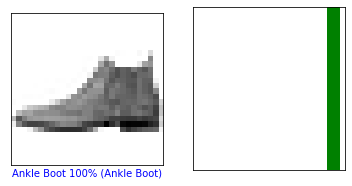

In [9]:
#We will look at the zeroth image prediction first
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions ,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

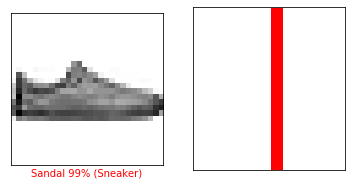

In [10]:
#We will look at 12th image
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions ,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

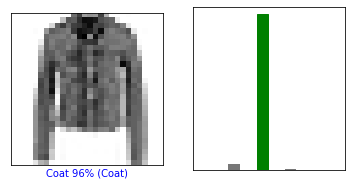

In [11]:
#We will look at the 10th image
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions ,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

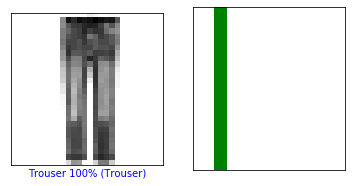

In [12]:
#We will look at the 15th image prediction first
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions ,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

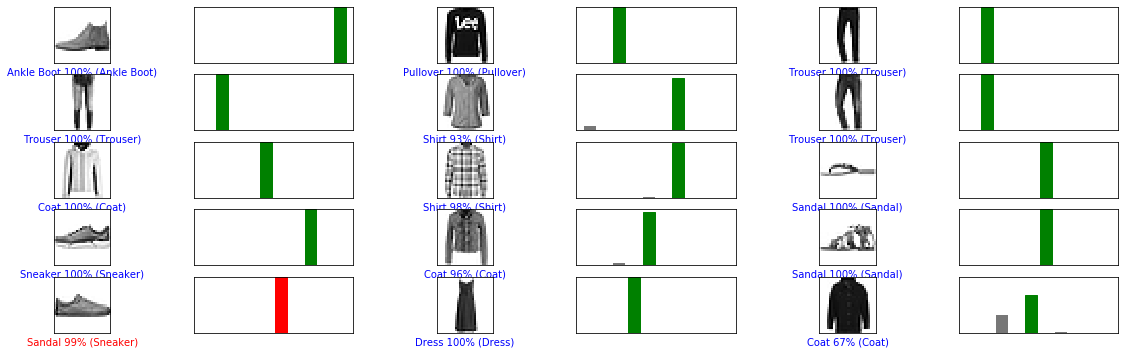

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_rows, 2*num_cols))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i,predictions, test_labels)
plt.show()

In [25]:
img = test_images[0]
print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))
print(img.shape)
#Tensorflow models are optimized to accept lists, so even if we are predicting a single image we are converting it into list


(1, 28, 28)


In [27]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.0487243e-09 1.0180844e-08 2.2912722e-07 1.3315370e-07 1.3214466e-06
  9.3790251e-05 4.6208274e-07 1.6839882e-05 6.7193696e-08 9.9988711e-01]]


([<matplotlib.axis.XTick at 0x7fa5bb086710>,
 <a list of 10 Text xticklabel objects>)

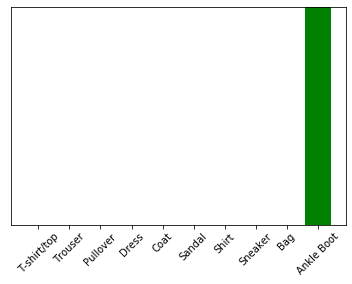

In [32]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_name, rotation = 45)

In [33]:
np.argmax(predictions_single[0])

9